In [1]:
import numpy as np
import scienceplots 
import matplotlib.pyplot as plt
from numba import njit
# from scipy.ndimage import convolve, generate_binary_structure
import itertools
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.style.use(['science','notebook','grid'])
from numba import vectorize, int32, int64, float32, float64
import multiprocessing
# from multiprocessing import Pool
import concurrent.futures
from scipy.integrate import solve_ivp

In [2]:
%%html
<style>
.jp-Notebook {
  --jp-notebook-max-width: 100%;
}</style>

In [3]:
# @njit
# def K(time,pos,n):
      
#     k1= np.zeros(N+1,dtype = 'complex128')
#     k2= np.zeros(N+1,dtype = 'complex128')

#     k3= np.zeros(N+1,dtype = 'complex128')
#     k4= np.zeros(N+1,dtype = 'complex128')
    
#     k5= np.zeros(N+1,dtype = 'complex128')
#     k6= np.zeros(N+1,dtype = 'complex128')
    
    
    
#     k1 = f(time , pos)
    
#     k2 = f(time+n/4 , pos+n*k1/4)
    
#     k3 = f(time+n/4 , pos + n*k1/8 + n*k2/8 )
    
#     k4 = f(time+ n/2 , pos - n*k2/2  + n*k3)
    
#     k5 = f(time + 3*n/4, pos - (3/16)*k1*n  + (9/16)*k4*n)
    
#     k6 = f(time + n , pos - 3*n*k1/7 + (2/7)*n*k2 + (12/7)*n*k3 - (12/7)*n*k4 + (8/7)*n*k5  )
    
#     return k1,k2,k3,k4,k5,k6
@njit
def K(time,pos,n):
    
    k1= np.zeros(N+1,dtype = 'complex128')
    k2= np.zeros(N+1,dtype = 'complex128')

    k3= np.zeros(N+1,dtype = 'complex128')
    k4= np.zeros(N+1,dtype = 'complex128')
    
    
    k1 = f(time,pos)
    k2 = f(time+n/2,pos+n*k1/2)
    
    k3 = f(time+n/2,pos+n*k2/2)
    k4 = f(time+n,pos+n*k3)
    
    return k1,k2,k3,k4

In [4]:
# 14 shells
# @njit
# def f(t,Z):
    
#     A = np.array([0,
#                  -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
#                  -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
#                  -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
#                  -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
#                  -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
#                  -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
#                  -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
#                  -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
#                  -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
#                  -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
#                  -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
#                  -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
#                  -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
#                  -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((c*k_n[12]*Z[13]*Z[12]))])   
#     return A





# #18 shells
# @njit
# def f(t,Z):
    
#     A = np.array([0,
#                  -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
#                  -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
#                  -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
#                  -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
#                  -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
#                  -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
#                  -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
#                  -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
#                  -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
#                  -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
#                  -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
#                  -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
#                 -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((a*k_n[13]*Z[14]*Z[15] + b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
#                 -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((a*k_n[14]*Z[15]*Z[16] + b*k_n[13]*Z[13]*Z[15] + c*k_n[12]*Z[13]*Z[12])),
#                 -1*nu*(k_n[15]**2)*Z[15]+F[15]+1J*np.conj((a*k_n[15]*Z[16]*Z[17] + b*k_n[14]*Z[14]*Z[16] + c*k_n[13]*Z[14]*Z[13])),
#                 -1*nu*(k_n[16]**2)*Z[16]+F[16]+1J*np.conj((a*k_n[16]*Z[17]*Z[18] + b*k_n[15]*Z[15]*Z[17] + c*k_n[14]*Z[15]*Z[14])),
#                 -1*nu*(k_n[17]**2)*Z[17]+F[17]+1J*np.conj((b*k_n[16]*Z[16]*Z[18] + c*k_n[15]*Z[16]*Z[15])),
#                 -1*nu*(k_n[18]**2)*Z[18]+F[18]+1J*np.conj((c*k_n[16]*Z[17]*Z[16]))]) 
#     return A




#20 shells
# @njit
# def f(t,Z):   
#     A = np.array([0,
#                  -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
#                  -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
#                  -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
#                  -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
#                  -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
#                  -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
#                  -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
#                  -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
#                  -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
#                  -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
#                  -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
#                  -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
#                 -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((a*k_n[13]*Z[14]*Z[15] + b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
#                 -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((a*k_n[14]*Z[15]*Z[16] + b*k_n[13]*Z[13]*Z[15] + c*k_n[12]*Z[13]*Z[12])),
#                 -1*nu*(k_n[15]**2)*Z[15]+F[15]+1J*np.conj((a*k_n[15]*Z[16]*Z[17] + b*k_n[14]*Z[14]*Z[16] + c*k_n[13]*Z[14]*Z[13])),
#                 -1*nu*(k_n[16]**2)*Z[16]+F[16]+1J*np.conj((a*k_n[16]*Z[17]*Z[18] + b*k_n[15]*Z[15]*Z[17] + c*k_n[14]*Z[15]*Z[14])),
#                 -1*nu*(k_n[17]**2)*Z[17]+F[17]+1J*np.conj((a*k_n[17]*Z[18]*Z[19] + b*k_n[16]*Z[16]*Z[18] + c*k_n[15]*Z[16]*Z[15])),
#                 -1*nu*(k_n[18]**2)*Z[18]+F[18]+1J*np.conj((a*k_n[18]*Z[19]*Z[20] + b*k_n[17]*Z[17]*Z[19] + c*k_n[16]*Z[17]*Z[16])),
#                 -1*nu*(k_n[19]**2)*Z[19]+F[19]+1J*np.conj((b*k_n[18]*Z[18]*Z[20] + c*k_n[17]*Z[18]*Z[17])),
#                 -1*nu*(k_n[20]**2)*Z[20]+F[20]+1J*np.conj((c*k_n[18]*Z[19]*Z[18]))])     
#     return A








# 22 shells
@njit
def f(t,Z):  
    
    A = np.array([0,
                 -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
                 -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
                 -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
                 -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
                 -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
                 -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
                 -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
                 -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
                 -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
                 -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
                 -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
                 -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
                -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((a*k_n[13]*Z[14]*Z[15] + b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
                -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((a*k_n[14]*Z[15]*Z[16] + b*k_n[13]*Z[13]*Z[15] + c*k_n[12]*Z[13]*Z[12])),
                -1*nu*(k_n[15]**2)*Z[15]+F[15]+1J*np.conj((a*k_n[15]*Z[16]*Z[17] + b*k_n[14]*Z[14]*Z[16] + c*k_n[13]*Z[14]*Z[13])),
                -1*nu*(k_n[16]**2)*Z[16]+F[16]+1J*np.conj((a*k_n[16]*Z[17]*Z[18] + b*k_n[15]*Z[15]*Z[17] + c*k_n[14]*Z[15]*Z[14])),
                -1*nu*(k_n[17]**2)*Z[17]+F[17]+1J*np.conj((a*k_n[17]*Z[18]*Z[19] + b*k_n[16]*Z[16]*Z[18] + c*k_n[15]*Z[16]*Z[15])),
                -1*nu*(k_n[18]**2)*Z[18]+F[18]+1J*np.conj((a*k_n[18]*Z[19]*Z[20] + b*k_n[17]*Z[17]*Z[19] + c*k_n[16]*Z[17]*Z[16])),
                -1*nu*(k_n[19]**2)*Z[19]+F[19]+1J*np.conj((a*k_n[19]*Z[20]*Z[21] + b*k_n[18]*Z[18]*Z[20] + c*k_n[17]*Z[18]*Z[17])),
                -1*nu*(k_n[20]**2)*Z[20]+F[20]+1J*np.conj((a*k_n[20]*Z[21]*Z[22] + b*k_n[19]*Z[19]*Z[21] + c*k_n[18]*Z[19]*Z[18])),
                -1*nu*(k_n[21]**2)*Z[21]+F[21]+1J*np.conj((b*k_n[20]*Z[20]*Z[22] + c*k_n[19]*Z[20]*Z[19])),
                -1*nu*(k_n[22]**2)*Z[22]+F[22]+1J*np.conj((c*k_n[20]*Z[21]*Z[20]))],dtype = 'complex128')     
    return A




# 23 shells
# @njit
# def f(t,Z):
    
#     A = np.array([0,
#                  -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
#                  -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
#                  -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
#                  -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
#                  -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
#                  -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
#                  -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
#                  -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
#                  -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
#                  -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
#                  -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
#                  -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
#                 -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((a*k_n[13]*Z[14]*Z[15] + b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
#                 -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((a*k_n[14]*Z[15]*Z[16] + b*k_n[13]*Z[13]*Z[15] + c*k_n[12]*Z[13]*Z[12])),
#                 -1*nu*(k_n[15]**2)*Z[15]+F[15]+1J*np.conj((a*k_n[15]*Z[16]*Z[17] + b*k_n[14]*Z[14]*Z[16] + c*k_n[13]*Z[14]*Z[13])),
#                 -1*nu*(k_n[16]**2)*Z[16]+F[16]+1J*np.conj((a*k_n[16]*Z[17]*Z[18] + b*k_n[15]*Z[15]*Z[17] + c*k_n[14]*Z[15]*Z[14])),
#                 -1*nu*(k_n[17]**2)*Z[17]+F[17]+1J*np.conj((a*k_n[17]*Z[18]*Z[19] + b*k_n[16]*Z[16]*Z[18] + c*k_n[15]*Z[16]*Z[15])),
#                 -1*nu*(k_n[18]**2)*Z[18]+F[18]+1J*np.conj((a*k_n[18]*Z[19]*Z[20] + b*k_n[17]*Z[17]*Z[19] + c*k_n[16]*Z[17]*Z[16])),
#                 -1*nu*(k_n[19]**2)*Z[19]+F[19]+1J*np.conj((a*k_n[19]*Z[20]*Z[21] + b*k_n[18]*Z[18]*Z[20] + c*k_n[17]*Z[18]*Z[17])),
#                 -1*nu*(k_n[20]**2)*Z[20]+F[20]+1J*np.conj((a*k_n[20]*Z[21]*Z[22] + b*k_n[19]*Z[19]*Z[21] + c*k_n[18]*Z[19]*Z[18])),
#                 -1*nu*(k_n[21]**2)*Z[21]+F[21]+1J*np.conj((a*k_n[21]*Z[22]*Z[23] + b*k_n[20]*Z[20]*Z[22] + c*k_n[19]*Z[20]*Z[19])),
#                 -1*nu*(k_n[22]**2)*Z[22]+F[22]+1J*np.conj((b*k_n[21]*Z[21]*Z[23] +c*k_n[20]*Z[21]*Z[20])),
#                 -1*nu*(k_n[23]**2)*Z[23]+F[23]+1J*np.conj((c*k_n[21]*Z[22]*Z[21]))]) 
#     return A






# 24 shells
# @njit
# def f(t,Z):
    
#     Z = Z.astype('complex128') 
#     A = np.array([0,
#                  -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
#                  -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
#                  -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
#                  -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
#                  -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
#                  -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
#                  -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
#                  -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
#                  -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
#                  -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
#                  -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
#                  -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
#                 -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((a*k_n[13]*Z[14]*Z[15] + b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
#                 -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((a*k_n[14]*Z[15]*Z[16] + b*k_n[13]*Z[13]*Z[15] + c*k_n[12]*Z[13]*Z[12])),
#                 -1*nu*(k_n[15]**2)*Z[15]+F[15]+1J*np.conj((a*k_n[15]*Z[16]*Z[17] + b*k_n[14]*Z[14]*Z[16] + c*k_n[13]*Z[14]*Z[13])),
#                 -1*nu*(k_n[16]**2)*Z[16]+F[16]+1J*np.conj((a*k_n[16]*Z[17]*Z[18] + b*k_n[15]*Z[15]*Z[17] + c*k_n[14]*Z[15]*Z[14])),
#                 -1*nu*(k_n[17]**2)*Z[17]+F[17]+1J*np.conj((a*k_n[17]*Z[18]*Z[19] + b*k_n[16]*Z[16]*Z[18] + c*k_n[15]*Z[16]*Z[15])),
#                 -1*nu*(k_n[18]**2)*Z[18]+F[18]+1J*np.conj((a*k_n[18]*Z[19]*Z[20] + b*k_n[17]*Z[17]*Z[19] + c*k_n[16]*Z[17]*Z[16])),
#                 -1*nu*(k_n[19]**2)*Z[19]+F[19]+1J*np.conj((a*k_n[19]*Z[20]*Z[21] + b*k_n[18]*Z[18]*Z[20] + c*k_n[17]*Z[18]*Z[17])),
#                 -1*nu*(k_n[20]**2)*Z[20]+F[20]+1J*np.conj((a*k_n[20]*Z[21]*Z[22] + b*k_n[19]*Z[19]*Z[21] + c*k_n[18]*Z[19]*Z[18])),
#                 -1*nu*(k_n[21]**2)*Z[21]+F[21]+1J*np.conj((a*k_n[21]*Z[22]*Z[23] + b*k_n[20]*Z[20]*Z[22] + c*k_n[19]*Z[20]*Z[19])),
#                 -1*nu*(k_n[22]**2)*Z[22]+F[22]+1J*np.conj((a*k_n[22]*Z[23]*Z[24] + b*k_n[21]*Z[21]*Z[23] +c*k_n[20]*Z[21]*Z[20])),
#                 -1*nu*(k_n[23]**2)*Z[23]+F[23]+1J*np.conj((b*k_n[22]*Z[22]*Z[24] + c*k_n[21]*Z[22]*Z[21])),
#                 -1*nu*(k_n[24]**2)*Z[24]+F[24]+1J*np.conj((c*k_n[22]*Z[23]*Z[22]))],dtype = 'complex128') 
#     return A

# #25
# @njit
# def f(t,Z):
    
#     A = np.array([0,
#                  -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
#                  -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
#                  -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
#                  -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
#                  -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
#                  -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
#                  -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
#                  -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
#                  -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
#                  -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
#                  -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
#                  -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
#                 -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((a*k_n[13]*Z[14]*Z[15] + b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
#                 -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((a*k_n[14]*Z[15]*Z[16] + b*k_n[13]*Z[13]*Z[15] + c*k_n[12]*Z[13]*Z[12])),
#                 -1*nu*(k_n[15]**2)*Z[15]+F[15]+1J*np.conj((a*k_n[15]*Z[16]*Z[17] + b*k_n[14]*Z[14]*Z[16] + c*k_n[13]*Z[14]*Z[13])),
#                 -1*nu*(k_n[16]**2)*Z[16]+F[16]+1J*np.conj((a*k_n[16]*Z[17]*Z[18] + b*k_n[15]*Z[15]*Z[17] + c*k_n[14]*Z[15]*Z[14])),
#                 -1*nu*(k_n[17]**2)*Z[17]+F[17]+1J*np.conj((a*k_n[17]*Z[18]*Z[19] + b*k_n[16]*Z[16]*Z[18] + c*k_n[15]*Z[16]*Z[15])),
#                 -1*nu*(k_n[18]**2)*Z[18]+F[18]+1J*np.conj((a*k_n[18]*Z[19]*Z[20] + b*k_n[17]*Z[17]*Z[19] + c*k_n[16]*Z[17]*Z[16])),
#                 -1*nu*(k_n[19]**2)*Z[19]+F[19]+1J*np.conj((a*k_n[19]*Z[20]*Z[21] + b*k_n[18]*Z[18]*Z[20] + c*k_n[17]*Z[18]*Z[17])),
#                 -1*nu*(k_n[20]**2)*Z[20]+F[20]+1J*np.conj((a*k_n[20]*Z[21]*Z[22] + b*k_n[19]*Z[19]*Z[21] + c*k_n[18]*Z[19]*Z[18])),
#                 -1*nu*(k_n[21]**2)*Z[21]+F[21]+1J*np.conj((a*k_n[21]*Z[22]*Z[23] + b*k_n[20]*Z[20]*Z[22] + c*k_n[19]*Z[20]*Z[19])),
#                 -1*nu*(k_n[22]**2)*Z[22]+F[22]+1J*np.conj((a*k_n[22]*Z[23]*Z[24] + b*k_n[21]*Z[21]*Z[23] +c*k_n[20]*Z[21]*Z[20])),
#                 -1*nu*(k_n[23]**2)*Z[23]+F[23]+1J*np.conj((a*k_n[23]*Z[24]*Z[25]+ b*k_n[22]*Z[22]*Z[24]+c*k_n[21]*Z[22]*Z[21])),
#                 -1*nu*(k_n[24]**2)*Z[24]+F[24]+1J*np.conj((b*k_n[23]*Z[23]*Z[25]+c*k_n[22]*Z[23]*Z[22])),
#                 -1*nu*(k_n[25]**2)*Z[25]+F[25]+1J*np.conj((c*k_n[23]*Z[24]*Z[23]))]) 
#     return A





#28 shells
# @njit
# def f(t,Z):
    
#     A = np.array([0,
#                  -1*nu*(k_n[1]**2)*Z[1]+F[1]+1J*np.conj((a*k_n[1]*Z[2]*Z[3])),
#                  -1*nu*(k_n[2]**2)*Z[2]+F[2]+1J*np.conj((a*k_n[2]*Z[3]*Z[4] + b*k_n[1]*Z[1]*Z[3])),
#                  -1*nu*(k_n[3]**2)*Z[3]+F[3]+1J*np.conj((a*k_n[3]*Z[4]*Z[5] + b*k_n[2]*Z[2]*Z[4] + c*k_n[1]*Z[2]*Z[1])),
#                  -1*nu*(k_n[4]**2)*Z[4]+F[4]+1J*np.conj((a*k_n[4]*Z[5]*Z[6] + b*k_n[3]*Z[3]*Z[5] + c*k_n[2]*Z[3]*Z[2])),
#                  -1*nu*(k_n[5]**2)*Z[5]+F[5]+1J*np.conj((a*k_n[5]*Z[6]*Z[7] + b*k_n[4]*Z[4]*Z[6] + c*k_n[3]*Z[4]*Z[3])),
#                  -1*nu*(k_n[6]**2)*Z[6]+F[6]+1J*np.conj((a*k_n[6]*Z[7]*Z[8] + b*k_n[5]*Z[5]*Z[7] + c*k_n[4]*Z[5]*Z[4])),
#                  -1*nu*(k_n[7]**2)*Z[7]+F[7]+1J*np.conj((a*k_n[7]*Z[8]*Z[9] + b*k_n[6]*Z[6]*Z[8] + c*k_n[5]*Z[6]*Z[5])),
#                  -1*nu*(k_n[8]**2)*Z[8]+F[8]+1J*np.conj((a*k_n[8]*Z[9]*Z[10] + b*k_n[7]*Z[7]*Z[9] + c*k_n[6]*Z[7]*Z[6])),
#                  -1*nu*(k_n[9]**2)*Z[9]+F[9]+1J*np.conj((a*k_n[9]*Z[10]*Z[11] + b*k_n[8]*Z[8]*Z[10] + c*k_n[7]*Z[8]*Z[7])),
#                  -1*nu*(k_n[10]**2)*Z[10]+F[10]+1J*np.conj((a*k_n[10]*Z[11]*Z[12] + b*k_n[9]*Z[9]*Z[11] + c*k_n[8]*Z[9]*Z[8])),
#                  -1*nu*(k_n[11]**2)*Z[11]+F[11]+1J*np.conj((a*k_n[11]*Z[12]*Z[13] + b*k_n[10]*Z[10]*Z[12] + c*k_n[9]*Z[10]*Z[9])),
#                  -1*nu*(k_n[12]**2)*Z[12]+F[12]+1J*np.conj((a*k_n[12]*Z[13]*Z[14] + b*k_n[11]*Z[11]*Z[13] + c*k_n[10]*Z[11]*Z[10])),
#                 -1*nu*(k_n[13]**2)*Z[13]+F[13]+1J*np.conj((a*k_n[13]*Z[14]*Z[15] + b*k_n[12]*Z[12]*Z[14] + c*k_n[11]*Z[12]*Z[11])),
#                 -1*nu*(k_n[14]**2)*Z[14]+F[14]+1J*np.conj((a*k_n[14]*Z[15]*Z[16] + b*k_n[13]*Z[13]*Z[15] + c*k_n[12]*Z[13]*Z[12])),
#                 -1*nu*(k_n[15]**2)*Z[15]+F[15]+1J*np.conj((a*k_n[15]*Z[16]*Z[17] + b*k_n[14]*Z[14]*Z[16] + c*k_n[13]*Z[14]*Z[13])),
#                 -1*nu*(k_n[16]**2)*Z[16]+F[16]+1J*np.conj((a*k_n[16]*Z[17]*Z[18] + b*k_n[15]*Z[15]*Z[17] + c*k_n[14]*Z[15]*Z[14])),
#                 -1*nu*(k_n[17]**2)*Z[17]+F[17]+1J*np.conj((a*k_n[17]*Z[18]*Z[19] + b*k_n[16]*Z[16]*Z[18] + c*k_n[15]*Z[16]*Z[15])),
#                 -1*nu*(k_n[18]**2)*Z[18]+F[18]+1J*np.conj((a*k_n[18]*Z[19]*Z[20] + b*k_n[17]*Z[17]*Z[19] + c*k_n[16]*Z[17]*Z[16])),
#                 -1*nu*(k_n[19]**2)*Z[19]+F[19]+1J*np.conj((a*k_n[19]*Z[20]*Z[21] + b*k_n[18]*Z[18]*Z[20] + c*k_n[17]*Z[18]*Z[17])),
#                 -1*nu*(k_n[20]**2)*Z[20]+F[20]+1J*np.conj((a*k_n[20]*Z[21]*Z[22] + b*k_n[19]*Z[19]*Z[21] + c*k_n[18]*Z[19]*Z[18])),
#                 -1*nu*(k_n[21]**2)*Z[21]+F[21]+1J*np.conj((a*k_n[21]*Z[22]*Z[23] + b*k_n[20]*Z[20]*Z[22] + c*k_n[19]*Z[20]*Z[19])),
#                 -1*nu*(k_n[22]**2)*Z[22]+F[22]+1J*np.conj((a*k_n[22]*Z[23]*Z[24] + b*k_n[21]*Z[21]*Z[23] +c*k_n[20]*Z[21]*Z[20])),
#                 -1*nu*(k_n[23]**2)*Z[23]+F[23]+1J*np.conj((a*k_n[23]*Z[24]*Z[25]+ b*k_n[22]*Z[22]*Z[24]+c*k_n[21]*Z[22]*Z[21])),
#                 -1*nu*(k_n[24]**2)*Z[24]+F[24]+1J*np.conj((a*k_n[24]*Z[25]*Z[26] + b*k_n[23]*Z[23]*Z[25]+c*k_n[22]*Z[23]*Z[22])),
#                 -1*nu*(k_n[25]**2)*Z[25]+F[25]+1J*np.conj((a*k_n[25]*Z[26]*Z[27]+b*k_n[24]*Z[24]*Z[26]+c*k_n[23]*Z[24]*Z[23])),
#                 -1*nu*(k_n[26]**2)*Z[26]+F[26]+1J*np.conj((a*k_n[26]*Z[27]*Z[28]+b*k_n[25]*Z[25]*Z[27]+c*k_n[24]*Z[25]*Z[24])),
#                 -1*nu*(k_n[27]**2)*Z[27]+F[27]+1J*np.conj((b*k_n[26]*Z[26]*Z[28]+c*k_n[25]*Z[26]*Z[25])),
#                 -1*nu*(k_n[28]**2)*Z[28]+F[28]+1J*np.conj((c*k_n[26]*Z[27]*Z[26]))]) 
#     return A

In [5]:
#Since, we pass an array it will also get modified with every itteration Mind it!!!
@njit
def iterator(Tot_step,y,T): 
    
    for i in range(1,Tot_step):
        
        ka= np.zeros(N+1,dtype = 'complex128')
        kb= np.zeros(N+1,dtype = 'complex128')

        kc= np.zeros(N+1,dtype = 'complex128')
        kd= np.zeros(N+1,dtype = 'complex128')
        
        ka,kb,kc,kd = K(T[i-1],y[:,i-1],step)
        
        y[:,i] = y[:,i-1] + (step/6)*(ka+2*kb+2*kc+kd) 
        

# @njit    
# def iterator(Tot_step,y,T): 
    
    
#     for i in range(1,5):
        
#         ka= np.zeros(N+1,dtype = 'complex128')
#         kb= np.zeros(N+1,dtype = 'complex128')

#         kc= np.zeros(N+1,dtype = 'complex128')
#         kd= np.zeros(N+1,dtype = 'complex128')
        
        
#         ke= np.zeros(N+1,dtype = 'complex128')
#         kf= np.zeros(N+1,dtype = 'complex128')
        
#         ka,kb,kc,kd,ke,kf = K(T[i-1],y[:,i-1],step)
        
#         y[:,i] = y[:,i-1] + (step/90)*(7*ka + 32*kc + 12*kd  + 32*ke + 7*kf ) 
        
        
#     for i in range(5,Tot_step):
        
#         y_p = y[:,i-1] + (step/720)*(1901*f(t[i-1],y[:,i-1]) -2774*f(t[i-2],y[:,i-2]) +  2616*f(t[i-3],y[:,i-3]) -1274*f(t[i-4],y[:,i-4]) + 251*f(t[i-5],y[:,i-5]))
        
#         y[:,i] = y[:,i-1] + (step/720)*(251*f(t[i],y_p) +646*f(t[i-1] ,y[:,i-1]) - 264*f(t[i-2],y[:,i-2])  + 106*f(t[i-3],y[:,i-3]) -19*f(t[i-4],y[:,i-4]))

In [6]:
%%time

lamb = 2
nu = 1e-7
epsilon = 0.5 


# Number of variables
N = 22

k_0 = 1/16 + 0J
a = 1
b =  -epsilon
c = -1 + epsilon

k_n = np.append(k_0,k_0*(lamb**np.arange(1,N+1,dtype = "float64"))) # n = 0,1,2,3,...N

# Force term Final L

force = 0.5*(1+1J)*10e-2

F = np.zeros(N+1,dtype = 'c16')

F[4] = F[4] + force


#Time 
step = 1e-4
final_time = 200

tot_step = int(final_time/step)

t = np.linspace(0,final_time,num = tot_step,endpoint= True)

total_repeat = 1000
cores = 4

each_realization = int((total_repeat/cores))

CPU times: user 11.1 ms, sys: 3.53 ms, total: 14.6 ms
Wall time: 12 ms


In [7]:
#initialize the itterator
Y = np.column_stack(( np.append(np.sqrt(k_n[0:3])*np.exp(1J*np.random.uniform(0,2*np.pi,3)),np.sqrt(k_n[3:])*np.exp(-1*k_n[3:]**2)*np.exp(1J*np.random.uniform(0,2*np.pi,N-2))),
                           np.zeros([N+1,tot_step-1],dtype = 'c16')))

iterator(1,Y,t)

In [8]:
%%time
def repeator(repeat,seeding): 
    
    np.random.seed(seeding)

    vel_profile = np.zeros((N+1,tot_step),dtype = 'float64')
    
    for _ in range(repeat):
        
        b = 0 
        
    # inital condition
    
        init = np.append(np.sqrt(k_n[0:3])*np.exp(1J*np.random.uniform(0,2*np.pi,3),dtype='complex128'),np.sqrt(k_n[3:])*np.exp(-1*k_n[3:]**2,dtype= 'complex128')*np.exp(1J*np.random.uniform(0,2*np.pi,N-2)))
        
        Y = np.column_stack((init,np.zeros([N+1,tot_step-1],dtype = 'complex128')))
        
        iterator(tot_step,Y,t)  #Modifies the Y !!!
        
        vel_profile = vel_profile + np.abs(Y)**2
        print(b,end= '\r')
        b = b + 1
    return vel_profile

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs


In [9]:
%%time

final_data = np.zeros((N+1,tot_step))

args=[(each_realization,np.random.randint(1,100)),(each_realization,np.random.randint(1,100)),(each_realization,np.random.randint(1,100)),(each_realization,np.random.randint(1,100))]

with concurrent.futures.ProcessPoolExecutor() as executor:
    
    results = [executor.submit(repeator,a,b) for (a,b) in args]
    
    for f in concurrent.futures.as_completed(results):
        
        final_data = final_data + f.result()

final_data = (final_data)/cores

CPU times: user 2.38 s, sys: 3.15 s, total: 5.53 s
Wall time: 28min 48s


In [16]:
# np.save('GOY_shell_Model_'+str(N)+'_forced_avg_over_1000_times_over_200_sec',final_data)

In [11]:
# final_data =  vel_profile/total_repeat

In [12]:
# np.save('GOY_shell_Model_'+str(N)+'_final_data',final_data)

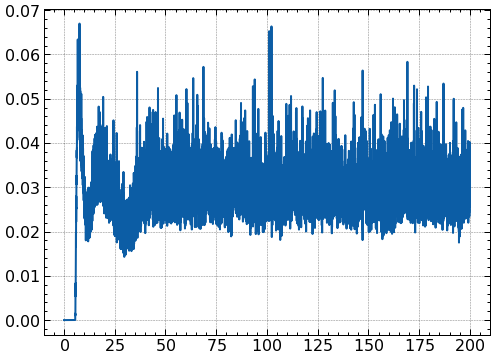

In [13]:
# final_data = np.load('GOY_shell_Model_'+str(N)+'_final_data.npy')

eps = np.sum(np.real(nu*(((final_data/(each_realization)))*(k_n[:,None])**2)),axis = 0)

plt.plot(t[::100],eps[::100])
plt.show()

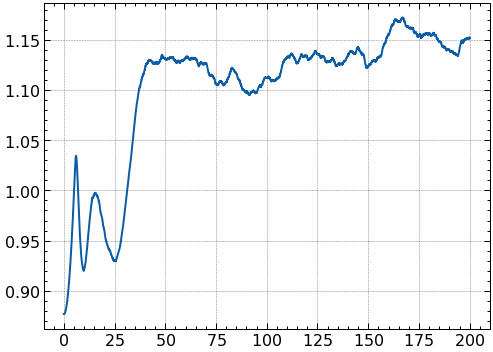

In [14]:
plt.plot(t,np.sum(final_data,axis = 0)/each_realization)
plt.show()